# WP7 - Exercise 1

---

### Support functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')   ## reset!
plt.style.use('paper.mplstyle')

def shear( sig_n, s1, s2 ) :
    """ 
    Creates a shear series for given values of principal stresses and sig_n
    """
    center = (s1 + s2)/2
    radius = (s1 - s2)/2
    dx = sig_n - center
    tau_sq = radius * radius - dx * dx
    tau_sq[ tau_sq < 0 ] = None
    return np.sqrt( tau_sq )

def mohr2d(s1, s3, ax, title="") :
    """ 
    Plot Mohr diagram 
    """
    # Setup data
    npts = 1000
 
    [s1,s3] = sorted([s1,s3], reverse=True)
    step = (s1-s3)/npts
    sig_n = np.sort( np.append( np.arange(s3,s1,step), [s1, s3]) )
    
    s13_tau = shear( sig_n, s1, s3 )

    # Do the plotting stuff
    ax.plot(sig_n, s13_tau, c='gray')

    ax.set_title(title, fontsize=20)
    ax.set_ylabel("Shear stress ($\\tau$)")
    ax.set_xlabel("Effective normal stress ($\sigma_n$)")

    return ax 


### Determine the best fitting parameters of a Coulomb criterion: $\sigma_1 = UCS + q \sigma_3$.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("DarleyDaleDataset.xlsx")
df["Sig3_MPa"] = df.S3_MPa - df.Pp_MPa
df["Sig1_MPa"] = df.S1_MPa - df.Pp_MPa
# Filter values beyond the linearity
df = df[df.Sig3_MPa < 100]

df["I1_MPa"] = df.Sig1_MPa + 2*df.Sig3_MPa
s1=df.Sig1_MPa
s3=df.Sig3_MPa
df["J2_MPa2"] = 1/6*( 2 * (s1-s3)**2 )
df["sqrt_J2_MPa"] = np.sqrt(df.J2_MPa2)


fig, ax = plt.subplots()
for name, g in df.groupby('S3_MPa'):
    ax.scatter(g.Pp_MPa, g.S1_MPa)
ax.set_xlabel("$P_p (MPa)$")
ax.set_ylabel("$\sigma_1 (MPa)$")

from scipy.stats import linregress
Q, UCS, r_value, p_value, std_err = linregress( df.Sig3_MPa, df.Sig1_MPa )
Sig3_fit = np.linspace(0,100,10)
Sig1_fit = Sig3_fit * Q + UCS

fig, ax = plt.subplots()
ax.scatter(df.Sig3_MPa, df.Sig1_MPa)
ax.plot(Sig3_fit, Sig1_fit, ls='--', color='k')
ax.set_xlabel("$\sigma_3$")
ax.set_ylabel("$\sigma_1$")
ax.set_xlim(0,150)
ax.set_ylim(0,600)

print(f"UCS={UCS:.2f} MPa q={Q:.4f}")
df

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### Determine the corresponding values of cohesive strength $S_0$ and friction angle $\varphi$ from point (1) and draw the shear failure line together with Mohr circles at failure. 

S0=18.78 MU=0.8376  PHI=39.95 deg


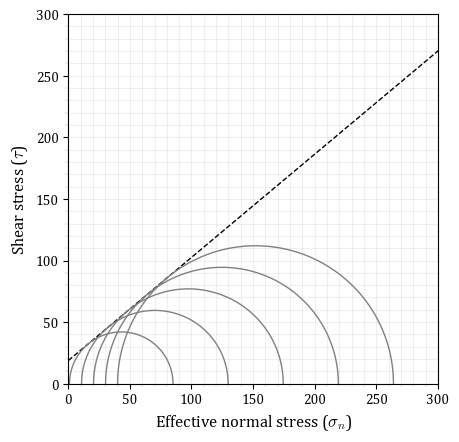

In [3]:
S0 = UCS / 2 / np.sqrt(Q)
MU = (Q-1) / 2 / np.sqrt(Q)

PHI = np.arctan(MU) 

print(f"S0={S0:.2f} MU={MU:.4f}  PHI={PHI*180/np.pi:.2f} deg")

sign=np.linspace(0,400,10)
tau = S0 + MU * sign

fig, ax = plt.subplots()
ax.plot(sign, tau, ls='--', color='k')
ax.set_xlim(0,300)
ax.set_ylim(0,300)

sig1_sig3 = Q
for sig3 in np.linspace(1,40,5) :
#    sig1 = sig1_sig3 * ( sig3 + S0 )
    sig1 = sig1_sig3 * ( sig3 + S0/MU ) - S0/MU
    mohr2d(sig1, sig3, ax)

ax.set_aspect('equal', 'box')

### Determine the corresponding fitting parameters for a Drucker-Prager criterion and plot experimental data in a $I_1$ v.s. $(J_2)^{1/2}$ space. 

Drucker-Prager:
   C3=20.35 C4=0.3174


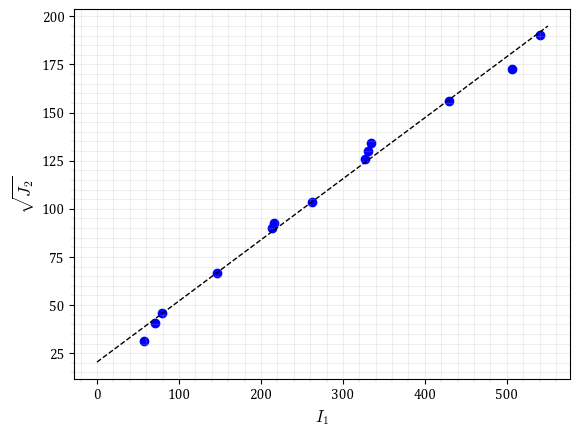

In [4]:
fig, ax = plt.subplots()
ax.scatter( df.I1_MPa, df.sqrt_J2_MPa )

from scipy.stats import linregress
C4, C3, r_value, p_value, std_err = linregress( df.I1_MPa, df.sqrt_J2_MPa  )
i1 = np.linspace(0,550,10)
sqrt_j2 = C3 + C4 * i1
ax.plot( i1, sqrt_j2, c='k', ls='--' )

ax.set_xlabel("$I_1$")
ax.set_ylabel("$\sqrt{J_2}$")

print("Drucker-Prager:")
print(f"   C3={C3:.2f} C4={C4:.4f}")

### Compute the corresponding tensile strength assuming a reasonable ratio of unconfined compression strength to tensile strength (browse Jaeger’s book). 
----

As of Section 4.5 and 4.6 of Jaeger's book, we can understand that a reasonable ration for $C_0/T_0 = [ \sqrt{\mu^2+1} + \mu ]^2$, or a reference value $C_0/T_0=15$. 

In [5]:
c0_t0 = ( np.sqrt( MU**2 + 1 ) + MU ) ** 2

C0 = UCS
T0 = C0 / c0_t0

print(f"\nC_0/T_0 = {c0_t0:.2f}")
print(f"UCS = {UCS:.2f}   T_0 = {T0:.2f} MPa")

# Using the ratio from a table in the book
c0_t0 = 15
C0 = UCS
T0 = C0 / c0_t0

print(f"\n\nC_0/T_0 = {c0_t0:.2f}")
print(f"UCS = {UCS:.2f}   T_0 = {T0:.2f} MPa")


C_0/T_0 = 4.59
UCS = 80.44   T_0 = 17.53 MPa


C_0/T_0 = 15.00
UCS = 80.44   T_0 = 5.36 MPa


# WP7 - Exercise 2

---

For this assignment you have to be able to calculate principal stresses on the wall of a wellbore at an arbitrary deviation and azimuth (See Chapter 6 of my notes “Wellbore stability” (https://dnicolasespinoza.github.io/) and Zoback's book Ch. 8).

Develop a script to compute and illustrate graphically (lower hemisphere projection):

1. The likelihood of tensile fractures considering wellbore mud pressure is equal to pore pressure in the formation $P_W = P_p$ and a simple tensile strength criterion (independent of intermediate and maximum principal stresses), i.e., required $T_s$.
1. The likelihood of breakouts considering wellbore mud pressure is equal to pore pressure in the formation $P_W = P_p$ and a simple unconfined compression strength criterion, i.e., required $UCS$.
1. The wellbore breakout angle $w_{BO}$ considering a Mohr-Coulomb shear failure criterion and the properties of the Darley Dale Sandstone from Exercise 1.
1. The wellbore breakout angle $w_{BO}$ considering a linear $I_1$ v.s. $(J_2)^{1/2}$ shear failure criterion and the properties of the Darley Dale Sandstone from Exercise 1.
1. The wellbore breakout angle $w_{BO}$ considering a Modified Lade shear failure criterion (Zoback's book, p. 100) and the properties of the Darley Dale Sandstone from point 1.

Limit your wellbore breakout angle plots to $0^{\circ} < w_{BO} < 60^{\circ}$ because predictions with linear elasticity over $w_{BO} > 60^{\circ}$ are likely highly inaccurate. Test your script with the three examples given in Zobacks's book in Figures 8.2 and 10.4 (normal faulting, strike-slip faulting, and reverse faulting). When computing breakouts assume $P_W$ = 32 MPa (NF), $P_W$ = 40 MPa (SSF), and $P_W$ = 52 MPa (RF). Use a Poisson ratio of 0.25 for stress calculations. 

In [6]:
#
#
#
def Sp_to_Sg(Sp, alpha, beta, gamma) :
  # ROTATION MATRIX
  CA, SA = np.cos(alpha), np.sin(alpha)
  CB, SB = np.cos(beta),  np.sin(beta)
  CG, SG = np.cos(gamma), np.sin(gamma)
  RPG = np.array(
        [ [ CA*CB,                SA*CB            ,   -SB  ],
          [ CA*SB*SG - SA*CG,     SA*SB*SG + CA*CG , CB*SG  ],
          [ CA*SB*CG + SA*SG,     SA*SB*CG - CA*SG , CB*CG  ]]
  )

  # MATRIX MULTIPLICATION - STRESS IN GEOGRAPHIC COORDINATES
  Sg = RPG.T @ Sp @ RPG
  return Sg

#
#
#
def Sg_to_Sw(Sg, delta, phi) :
  # ROTATION MATRIX
  CD = np.cos(delta)
  SD = np.sin(delta)
  CP = np.cos(phi)
  SP = np.sin(phi)
  
  Rb = np.array(
        [ [ -CD*CP,   -SD*CP ,  SP  ],
          [ SD,       -CD    ,   0  ],
          [ CD*SP,     SD*SP ,  CP  ]]
  )

  Sw = Rb @ Sg @ Rb.T
  return Sw

In [9]:
import numpy as np
import pandas as pd
from numpy import sin, cos, pi
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

def build_polar_plots() :

    global NU
    global SV, SHMAX, SHMIN, AZIMUTH, REGIME
    global PW, PP
    
    # Mohr coulomb failure criteria: Sig1 = UCS + Q * Sig3
    global MC_UCS, MC_Q
    # I1 x J2 Drucker Parger failure criteria: SQRT_J2 = C3 + V4 * I1
    global DP_C3, DP_C4
    
    MC_S0 = MC_UCS / 2 / np.sqrt(MC_Q)
    MC_MU = (MC_Q-1) / 2 / np.sqrt(MC_Q)
    MC_PHI = np.arctan(MC_MU) 
      
    # Modified Lade
    ML_S = MC_S0 / MC_MU
    ML_ETA = 4 * MC_MU**2 * ( 9 - 7 * np.sin(MC_PHI) ) / ( 1 - np.sin(MC_PHI) )
#    print(f"ML_ETA:{ML_ETA:.2f}  ML_S:{ML_S:.2f}")
    # MPa
    
    Delta_P = PW - PP

    # Sp
    Sp = [[ SV, 0, 0 ],[ 0, SHMAX, 0],[ 0, 0, SHMIN]]

    # Normal        : az, pi/2, 0
    # Strike slip   : az, 0,    pi/2
    # Reverse       : az, 0,    0
    if (REGIME == "NORMAL")     : Sg = Sp_to_Sg( Sp, AZIMUTH, pi/2  , 0 )
    if (REGIME == "STRIKESLIP") : Sg = Sp_to_Sg( Sp, AZIMUTH, 0     , pi/2 )
    if (REGIME == "REVERSE")    : Sg = Sp_to_Sg( Sp, AZIMUTH, 0     , 0 )
    
    phimesh, deltamesh = np.meshgrid( np.linspace(0,pi/2,30), np.linspace(0, 2*np.pi, 30) )
    Ts = np.zeros_like( deltamesh ) 
    UCS = np.zeros_like( deltamesh )
    MC_WBO = np.zeros_like( deltamesh )
    DP_WBO = np.zeros_like( deltamesh )
    ML_WBO = np.zeros_like( deltamesh )

    print("Calculating ... ")
    
    for i, j in np.ndindex(deltamesh.shape) :
        delta = deltamesh[i,j] ; phi = phimesh[i,j]
        Sw = Sg_to_Sw(Sg, delta, phi)
        [ [ sig11, sig12, sig13 ], [ sig21, sig22, sig23 ], [ sig31, sig32, sig33] ] = Sw - PP * np.identity(3)
        for theta in np.linspace(0,2*np.pi,180):  # Angle around the borehole          
            srr = Delta_P
            stt = sig11 + sig22 - 2*(sig11-sig22)*cos(2*theta) - 4*sig12*sin(2*theta) - Delta_P 
            szt = 2 * ( sig23*cos(theta) - sig13*sin(theta) )
            szz = sig33 - 2*NU*(sig11-sig22)*cos(2*theta) - 4*NU*sig12*sin(2*theta) 
    
            ST = [ [ stt, szt ], [ szt, szz] ]
            EV = sorted(eigvals(ST), reverse=True)
    
            if theta==0 : Ts[i,j] = EV[1] ; UCS[i,j] = EV[0] # Initialize
            Ts[i,j] = np.minimum( Ts[i,j], EV[1] ) 
            UCS[i,j] = np.maximum( UCS[i,j], EV[0] )
    
            # Mohr coulomb criteria
            mc_sig1_max = MC_UCS + MC_Q * EV[1]
            if EV[0] > mc_sig1_max : MC_WBO[i,j] += 1
    
            # Drucker Prager
            i1 = EV[1] + EV[0] + srr
            sqrt_j2 = np.sqrt ( 1/6*( (EV[0]-EV[1])**2 + (EV[0]-srr)**2 + (EV[1]-srr)**2 ) )
            sqrtj2_max = DP_C3 + DP_C4 * i1
            #print(f"i1:{i1:.2f} sqrt_j2:{sqrt_j2:.2f}  max:{sqrtj2_max:.2f}")
            if sqrt_j2 > sqrtj2_max : DP_WBO[i,j] += 1
    
            # Modified Lade
#            i1 = EV[1] + EV[0] + srr
#            i3 = EV[1] * EV[0] * srr
#            i1p = ( EV[1] + ML_S ) + ( EV[0] + ML_S ) + ( srr + ML_S )
#            i3p = ( EV[1] + ML_S ) * ( EV[0] + ML_S ) * ( srr + ML_S )
#            i1p_max = ( (27 + ML_ETA) * i3p )**(1/3)
#            if i1 > i1p : ML_WBO[i,j] += 1
    
    MC_WBO[ MC_WBO > 60 ] = 60
    DP_WBO[ MC_WBO > 60 ] = 60
    
    print("Data build ... [ok]")


    fig = plt.figure(figsize=(15, 20))

    ax = plt.subplot(321, projection='polar')
    CS = ax.contourf( deltamesh, phimesh*180/pi, Ts, cmap='jet', levels=50 ) # contourf or pcolormesh
    cbar = fig.colorbar(CS)
    ax.set_title("Required $Ts$")
    ax.set_theta_zero_location("N")
    
    ax = plt.subplot(322, projection='polar')
    CS = ax.contourf( deltamesh, phimesh*180/pi, UCS, cmap='jet', levels=50 ) # contourf or pcolormesh
    cbar = fig.colorbar(CS)
    ax.set_title("Required $UCS$")
    ax.set_theta_zero_location("N")
    
    ax = plt.subplot(323, projection='polar')
    CS = ax.contourf( deltamesh, phimesh*180/pi, MC_WBO, cmap='jet', levels=50 ) # contourf or pcolormesh
    cbar = fig.colorbar(CS)
    ax.set_title("Breakout width ($W_{BO}$) - Mohr Coulomb")
    ax.set_theta_zero_location("N")
    
    ax = plt.subplot(324, projection='polar')
    CS = ax.contourf( deltamesh, phimesh*180/pi, DP_WBO, cmap='jet', levels=50 ) # contourf or pcolormesh
    cbar = fig.colorbar(CS)
    ax.set_title("Breakout width ($W_{BO}$) - Drucker Prager - $I_1 \\times \sqrt{J_2}$")
    ax.set_theta_zero_location("N")
    
#   ax = plt.subplot(325, projection='polar')
#   CS = ax.contourf( deltamesh, phimesh*180/pi, ML_WBO, cmap='jet', levels=50 ) # contourf or pcolormesh
#    cbar = fig.colorbar(CS)
#    ax.set_title("Breakout width ($W_{BO}$) - Modified Lade")
#    ax.set_theta_zero_location("N")    
    
    print("Done")

Calculating ... 
Data build ... [ok]
Done


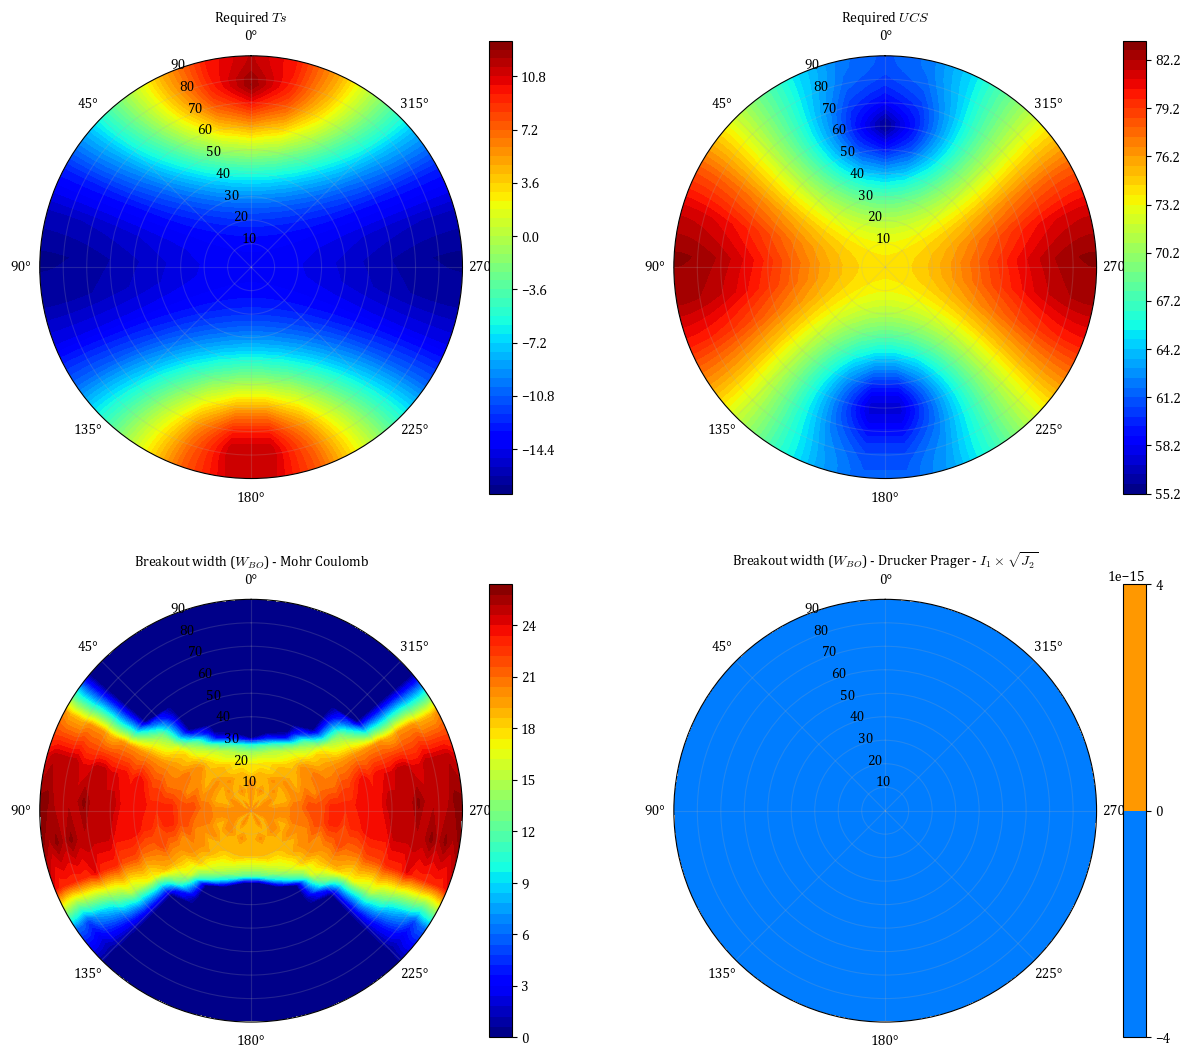

In [10]:
# Mohr coulomb failure criteria: Sig1 = UCS + Q * Sig3
MC_UCS=80.44
MC_Q=4.5881

# I1 x J2 Drucker Parger failure criteria: SQRT_J2 = C3 + V4 * I1
DP_C3=20.35
DP_C4=0.3174

SV = 70
SHMAX = 67 
SHMIN = 45
AZIMUTH = 0
REGIME = 'NORMAL'

PP = 32
PW = 50
NU = 0.25

build_polar_plots()